# Histogram management of an image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#testImage = './Test_Images/NGC7000.tif'
testImage = './NGC7000.tif'

In [3]:
#image = cv2.imread(testImage, cv2.IMREAD_ANYDEPTH | cv2.IMREAD_ANYCOLOR)
image = cv2.imread(testImage, cv2.IMREAD_UNCHANGED | cv2.IMREAD_ANYCOLOR)

In [4]:
image.max()

65535

In [5]:
image

array([[[ 1420,  1164,   805],
        [ 1400,  1171,   793],
        [ 1367,  1098,   758],
        ..., 
        [ 1231,   998,   759],
        [ 1259,  1014,   812],
        [ 1257,  1012,   810]],

       [[ 3625,  2897,  2007],
        [ 3576,  2894,  1984],
        [ 3428,  2792,  1869],
        ..., 
        [ 2420,  1988,  1439],
        [ 2455,  2007,  1481],
        [ 1871,  1508,  1125]],

       [[ 5985,  4576,  3253],
        [ 5902,  4577,  3224],
        [ 5570,  4516,  3057],
        ..., 
        [ 4879,  3949,  2808],
        [ 4336,  3435,  2532],
        [ 2460,  1938,  1437]],

       ..., 
       [[14984, 12341,  8792],
        [14965, 12530,  8885],
        [14783, 12483,  8933],
        ..., 
        [14238, 11821,  8576],
        [14287, 11880,  8625],
        [14254, 11829,  8652]],

       [[15099, 12444,  8893],
        [14955, 12511,  8909],
        [14702, 12488,  8831],
        ..., 
        [14326, 12019,  8542],
        [14350, 11807,  8574],
        [1

In [6]:
r, g, b = cv2.split(image)

(array([  1.35500000e+04,   1.45960000e+04,   1.23172260e+07,
          5.47286000e+06,   1.38060000e+05,   3.90170000e+04,
          1.68460000e+04,   7.98200000e+03,   3.80000000e+03,
          9.93000000e+02]),
 array([   961. ,   6468.1,  11975.2,  17482.3,  22989.4,  28496.5,
         34003.6,  39510.7,  45017.8,  50524.9,  56032. ]),
 <a list of 10 Patch objects>)

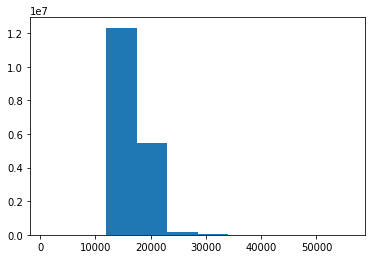

In [7]:
plt.hist(r.flatten())

In [8]:
r.min()

961

In [9]:
def normalizationRange(data, sigmaMult=2):
    dataMean = data.mean()
    dataStd = data.std()
    return(data.mean() - data.std()*sigmaMult, data.mean() + data.std()*sigmaMult)

In [10]:
image = image.astype(np.float32)

In [11]:
image /= image.max()

In [12]:
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB);

In [13]:
lab_image

array([[[  1.15966797e+00,  -2.50000000e-01,  -5.15625000e-01],
        [  1.15356445e+00,  -3.12500000e-01,  -3.28125000e-01],
        [  1.02539062e+00,  -2.50000000e-01,  -5.15625000e-01],
        ..., 
        [  9.15527344e-01,  -1.25000000e-01,  -4.68750000e-01],
        [  9.46044922e-01,   1.56250000e-02,  -4.21875000e-01],
        [  9.46044922e-01,   1.56250000e-02,  -4.21875000e-01]],

       [[  2.95410156e+00,  -5.46875000e-01,  -1.64062500e+00],
        [  2.94189453e+00,  -6.25000000e-01,  -1.42187500e+00],
        [  2.78930664e+00,  -6.09375000e-01,  -1.42187500e+00],
        ..., 
        [  1.96533203e+00,  -2.96875000e-01,  -7.96875000e-01],
        [  1.97753906e+00,  -2.18750000e-01,  -1.01562500e+00],
        [  1.44653320e+00,  -1.87500000e-01,  -7.03125000e-01]],

       [[  5.12695312e+00,  -4.21875000e-01,  -3.95312500e+00],
        [  5.12695312e+00,  -4.21875000e-01,  -3.95312500e+00],
        [  5.01098633e+00,  -1.06250000e+00,  -3.14062500e+00],
        

In [14]:
l, a, b = cv2.split(lab_image)

In [15]:
l

array([[  1.15966797,   1.15356445,   1.02539062, ...,   0.91552734,
          0.94604492,   0.94604492],
       [  2.95410156,   2.94189453,   2.78930664, ...,   1.96533203,
          1.97753906,   1.4465332 ],
       [  5.12695312,   5.12695312,   5.01098633, ...,   4.16870117,
          3.58276367,   1.97753906],
       ..., 
       [ 19.00634766,  19.19555664,  19.17114258, ...,  18.15185547,
         18.15185547,  18.15185547],
       [ 19.2199707 ,  19.19555664,  19.15283203, ...,  18.28613281,
         18.17016602,  18.15185547],
       [ 19.36645508,  19.18334961,  19.08569336, ...,  19.05517578,
         18.40209961,  18.38378906]], dtype=float32)

(array([  2.11830000e+04,   3.82003200e+06,   1.39604090e+07,
          1.64161000e+05,   3.40530000e+04,   1.29120000e+04,
          6.19500000e+03,   3.18800000e+03,   1.88400000e+03,
          9.13000000e+02]),
 array([  0.81787109,  10.29907227,  19.78027344,  29.26147461,
         38.74267578,  48.22387695,  57.70507812,  67.1862793 ,
         76.66748047,  86.14868164,  95.62988281]),
 <a list of 10 Patch objects>)

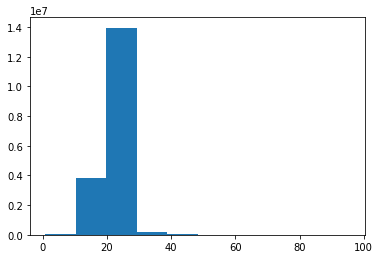

In [16]:
plt.hist(l.flatten())

In [17]:
normalization = normalizationRange(l, 3)

In [18]:
normalization

(12.840951919555664, 30.63365364074707)

In [19]:
l

array([[  1.15966797,   1.15356445,   1.02539062, ...,   0.91552734,
          0.94604492,   0.94604492],
       [  2.95410156,   2.94189453,   2.78930664, ...,   1.96533203,
          1.97753906,   1.4465332 ],
       [  5.12695312,   5.12695312,   5.01098633, ...,   4.16870117,
          3.58276367,   1.97753906],
       ..., 
       [ 19.00634766,  19.19555664,  19.17114258, ...,  18.15185547,
         18.15185547,  18.15185547],
       [ 19.2199707 ,  19.19555664,  19.15283203, ...,  18.28613281,
         18.17016602,  18.15185547],
       [ 19.36645508,  19.18334961,  19.08569336, ...,  19.05517578,
         18.40209961,  18.38378906]], dtype=float32)

In [20]:
def process(elem, normalization):
    if elem < normalization[0]:
        return normalization[0]
    elif elem > normalization[1]:
        return normalization[1]
    else:
        return elem

In [21]:
res = np.array([[process(elem, normalization) for elem in line] for line in l])

In [22]:
res

array([[ 12.84095192,  12.84095192,  12.84095192, ...,  12.84095192,
         12.84095192,  12.84095192],
       [ 12.84095192,  12.84095192,  12.84095192, ...,  12.84095192,
         12.84095192,  12.84095192],
       [ 12.84095192,  12.84095192,  12.84095192, ...,  12.84095192,
         12.84095192,  12.84095192],
       ..., 
       [ 19.00634766,  19.19555664,  19.17114258, ...,  18.15185547,
         18.15185547,  18.15185547],
       [ 19.2199707 ,  19.19555664,  19.15283203, ...,  18.28613281,
         18.17016602,  18.15185547],
       [ 19.36645508,  19.18334961,  19.08569336, ...,  19.05517578,
         18.40209961,  18.38378906]])

In [23]:
res.max()

30.63365364074707

In [24]:
res = res - res.min()

In [25]:
res = res * 100/res.max()

In [26]:
res = res.astype(np.float32, copy=False)

In [27]:
res

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ..., 
       [ 34.65126038,  35.71466827,  35.57745743, ...,  29.84877586,
         29.84877586,  29.84877586],
       [ 35.85188293,  35.71466827,  35.47454453, ...,  30.60345268,
         29.95168495,  29.84877586],
       [ 36.67516708,  35.64606476,  35.09720612, ...,  34.9256897 ,
         31.25521851,  31.15230751]], dtype=float32)

In [28]:
l

array([[  1.15966797,   1.15356445,   1.02539062, ...,   0.91552734,
          0.94604492,   0.94604492],
       [  2.95410156,   2.94189453,   2.78930664, ...,   1.96533203,
          1.97753906,   1.4465332 ],
       [  5.12695312,   5.12695312,   5.01098633, ...,   4.16870117,
          3.58276367,   1.97753906],
       ..., 
       [ 19.00634766,  19.19555664,  19.17114258, ...,  18.15185547,
         18.15185547,  18.15185547],
       [ 19.2199707 ,  19.19555664,  19.15283203, ...,  18.28613281,
         18.17016602,  18.15185547],
       [ 19.36645508,  19.18334961,  19.08569336, ...,  19.05517578,
         18.40209961,  18.38378906]], dtype=float32)

(array([  2.77880000e+04,   3.01900000e+03,   3.29030000e+05,
          4.01631100e+06,   5.54069000e+06,   4.85069500e+06,
          2.16177500e+06,   6.92542000e+05,   1.58497000e+05,
          2.44583000e+05]),
 array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
          90.,  100.]),
 <a list of 10 Patch objects>)

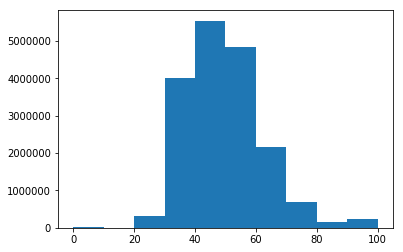

In [29]:
plt.hist(res.flatten())

In [30]:
lab_image = cv2.merge((res,a,b))

In [31]:
lab_image.max()

100.0

In [32]:
RGB_image = cv2.cvtColor(lab_image, cv2.COLOR_LAB2BGR);

In [33]:
RGB_image

array([[[  4.88298712e-03,   9.58400080e-04,   0.00000000e+00],
        [  3.08058551e-03,   1.07917178e-03,   0.00000000e+00],
        [  4.88298712e-03,   9.58400080e-04,   0.00000000e+00],
        ..., 
        [  4.45710216e-03,   5.58426487e-04,   0.00000000e+00],
        [  4.03396925e-03,   1.10658417e-04,   0.00000000e+00],
        [  4.03396925e-03,   1.10658417e-04,   0.00000000e+00]],

       [[  1.55669283e-02,   2.28903536e-03,   0.00000000e+00],
        [  1.34677170e-02,   2.44585448e-03,   0.00000000e+00],
        [  1.34704541e-02,   2.39806436e-03,   0.00000000e+00],
        ..., 
        [  7.56110856e-03,   1.20743411e-03,   0.00000000e+00],
        [  9.66327358e-03,   1.05060637e-03,   0.00000000e+00],
        [  6.68499339e-03,   8.37651023e-04,   0.00000000e+00]],

       [[  3.76804918e-02,   2.77517620e-03,   0.00000000e+00],
        [  3.76804918e-02,   2.77517620e-03,   0.00000000e+00],
        [  2.98326574e-02,   4.42940649e-03,   0.00000000e+00],
        

In [34]:
RGB_image *= 2**16 - 1

In [37]:
RGB_image = cv2.cvtColor(RGB_image, cv2.COLOR_BGR2RGB);

In [38]:
RGB_image.max()

65535.0

In [39]:
image2 = RGB_image.astype(np.uint16)
cv2.imwrite('image.png', image2)

True